In [152]:
!pip install opencv-contrib-python requests -q

In [2]:
import json
from base64 import b64encode

import requests  # pip install requests

GOOGLE_VISION_API_KEY = ""


def analyze_image(image_path):
    with open(image_path, "rb") as f:
        content = b64encode(f.read()).decode()

        payload = {
            "image": {
                "content": content,
            },
            "features": [
                {
                    "type": "DOCUMENT_TEXT_DETECTION",
                    "maxResults": 50,
                },
                {
                    "type": "LABEL_DETECTION",
                    "maxResults": 50,
                },
                {
                    "type": "LOGO_DETECTION",
                    "maxResults": 50,
                },
                {
                    "type": "OBJECT_LOCALIZATION",
                    "maxResults": 50,
                },
            ],
        }

    data = json.dumps({"requests": payload}).encode()

    response = requests.post(
        url="https://vision.googleapis.com/v1/images:annotate",
        data=data,
        params={
            "key": GOOGLE_VISION_API_KEY,
        },
        headers={
            "Content-Type": "application/json",
        },
    )

    if not response.ok:
        raise Exception(f"Status Code: {response.status_code} - Reason {response.text}")

    return response.json()["responses"][0]

In [3]:
image_path = r"images/3.png"

results = analyze_image(image_path)

label_annotations = [r["description"] for r in results.get("labelAnnotations", [])]
logo_annotations = [r["description"] for r in results.get("logoAnnotations", [])]
object_annotations = [r["name"] for r in results.get("localizedObjectAnnotations", [])]
full_text = results["fullTextAnnotation"]["text"]
annotations = results["textAnnotations"]

In [4]:
print("Labels:", label_annotations)
print("Logos:", logo_annotations)
print("Objects:", object_annotations)

Labels: ['Text', 'Number', 'Font', 'Screenshot', 'Document']
Logos: []
Objects: []


In [5]:
print("Full Text:", full_text)

Full Text: Tabela 21 - Valores dos prejuízos diretos atualizados.
Prejuízo decorrente
Data base da
Índice de
Obra
da atuação do
Valor atualizado
proposta
correção
cartel
On-Site da Carteira de
Gasolina da REGAP
(0800.0031362.07.20)
R$ 205.165.937,20
Out/2006
1,909251
R$ 391.713.270,76
EPC-1 Parte do Off-Site da
Carteira de Gasolina da UN-
R$ 197.253.769,74
Nov/2007
1,798437
R$ 354.748.477,88
REPLAN G4 2
(0800.0043836.08.2)
On-Site da Carteira de Diesel
| RLAM (0800.0042707.08.2)
R$ 314.300.581,88
Jan/2008
1,781220
RS 559.838.482,46
Unidade de Coqueamento
Retardado no COMPERJ
(0800.0057282.10.2)
R$ 435.305.844,41
Set/2009
1,554965
R$ 676.885.352,35
Totais
RS 1.152.026.133,22
RS 1.983.185.583,45


In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
def draw_bounds_box(image, text, rect, show_text: bool = False):
    (startX, startY, endX, endY) = rect
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    if show_text:
        cv2.putText(
            image,
            text,
            (startX, startY - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            (0, 0, 255),
            2,
        )
    return image

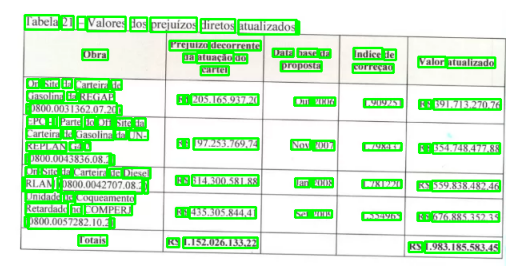

In [8]:
image = cv2.imread(image_path)
final = image.copy()


for index, text in enumerate(annotations[1::]):
    ocr = text["description"]

    startX = text["boundingPoly"]["vertices"][0]["x"]
    startY = text["boundingPoly"]["vertices"][0]["y"]
    endX = text["boundingPoly"]["vertices"][1]["x"]
    endY = text["boundingPoly"]["vertices"][2]["y"]

    rect = (startX, startY, endX, endY)

    final = draw_bounds_box(final, ocr, rect)

plt.imshow(final)
plt.axis("off")
plt.show()

In [ ]:
!pip install google-cloud-vision

In [5]:
import os

from google.cloud import vision

# Set the environment variable for the credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "service-account-file.json"


def analyze_image(image_path):
    # Initialize the Vision API client
    client = vision.ImageAnnotatorClient()

    # Load the image file
    with open(image_path, "rb") as image_file:
        content = image_file.read()

    # Create an Image object
    image = vision.Image(content=content)

    # Perform label detection
    response = client.label_detection(image=image)
    labels = response.label_annotations

    # Print the results
    print("Labels:")
    for label in labels:
        print(f"{label.description} (Score: {label.score:.2f})")

    print("Text")
    response = client.text_detection(image=image)
    texts = response.text_annotations
    for text in texts:
        print(f" - {text.description}")

    if response.error.message:
        raise Exception(f"{response.error.message}")


if __name__ == "__main__":
    # Path to the image file
    image_path = "images/1.jpg"

    # Analyze the image
    analyze_image(image_path)

Labels:
Personal care (Score: 0.53)
Text
 - LÍRIO
AZUL
F 10/24 L LIJ 15 2331 H
-64393812
O CORPO, ENSABOAR E
NO. ADVERTENCIAS:
CANCE DE CRIANÇAS. EM
OS OLHOS LAVAR
MAGUA. EM CASO DE
O USO E PROCURE A UM
ES):
SEM
FRA BENO
UnileverⓇ®
SAC: WWW.LUX.COM.BR. WHATSAPP: (11) 97539-8650.
Descubra mais em www.lux.com.br.
7 891150 060302
1
CEP 13272-000
18-15
 - LÍRIO
 - AZUL
 - F
 - 10/24
 - L
 - LIJ
 - 15
 - 2331
 - H
 - -64393812
 - O
 - CORPO
 - ,
 - ENSABOAR
 - E
 - NO
 - .
 - ADVERTENCIAS
 - :
 - CANCE
 - DE
 - CRIANÇAS
 - .
 - EM
 - OS
 - OLHOS
 - LAVAR
 - MAGUA
 - .
 - EM
 - CASO
 - DE
 - O
 - USO
 - E
 - PROCURE
 - A
 - UM
 - ES
 - )
 - :
 - SEM
 - FRA
 - BENO
 - UnileverⓇ®
 - SAC
 - :
 - WWW.LUX.COM.BR.
 - WHATSAPP
 - :
 - (
 - 11
 - )
 - 97539-8650
 - .
 - Descubra
 - mais
 - em
 - www.lux.com.br.
 - 7
 - 891150
 - 060302
 - 1
 - CEP
 - 13272-000
 - 18-15
